In [39]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import AdaBoostClassifier as AdaC
from sklearn.ensemble import GradientBoostingClassifier as GBC

import numpy as np

from sklearn.datasets import make_blobs, make_gaussian_quantiles

from utils import plot_2d, test_model
from plots import plot_tree_compare
from evaluation import dt_classifier_auc, get_auc_gbc_trees, get_auc_ada_trees

import matplotlib.pyplot as plt

import numpy as np

# import dataset packages
from sklearn.datasets import make_blobs

# import from project files
from utils import plot_2d, test_model
from plots import plot_tree_compare
from evaluation import dt_classifier_auc, get_auc_gbc_trees, get_auc_ada_trees

### Decision Trees outperforming Tree Boosting ###

Decision Trees usually have low bias and high variance. Tree Boosting can be used to reduce variance and help the tree to generalize better. So, to find a dataset where Decision Trees outperform Tree Boosting, the overfitting tendencies need to give the method an advantage. The dataset-DT is the same as Dataset-NN, with two classes that each have multiple randomly placed small clusters. It is of advantage here to have less bias and higher variance, because the method cannot make assumptions about the data. Therefore, Decision Trees are able to approximate the dataset quite well, while the Boosting method sets the decision boundaries too general, resulting in a worse AUC score. By increasing the amount of trees used for boosting, the score increases, but not to the level of the Decision Tree.

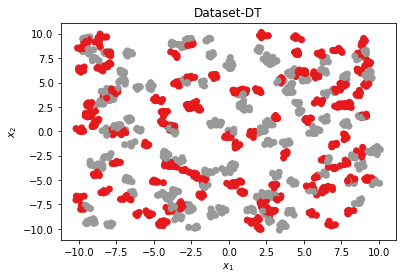

In [40]:
# Generate dataset
def data_dt():

    X, y = make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2

    return X, y

dt_X, dt_y = data_dt()
plot_2d(dt_X, dt_y, 'Dataset-DT')

Decision Tree Performance on Dataset-DT:
Mean AUC score: 0.852


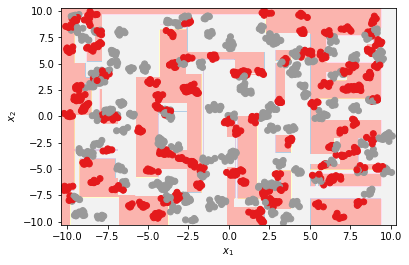

Tree Boosting ADA Performance Dataset-DT:
Mean AUC score: 0.631


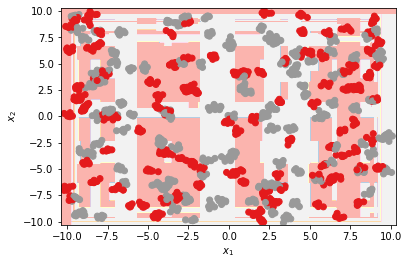

Tree Boosting GBC Performance on Dataset-DT:
Mean AUC score: 0.757


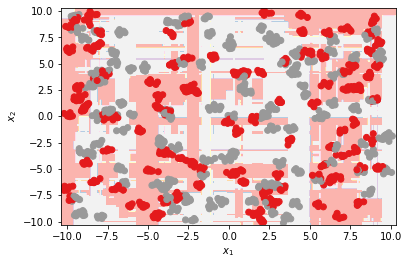

In [41]:
# Decision Trees
print('Decision Tree Performance on Dataset-DT:')
dtree=DTC(criterion='entropy', max_depth=35, min_samples_split=2)
test_model(dtree, dt_X, dt_y)

# Tree Boosting - ADA
ada = AdaC(n_estimators=200)
print('Tree Boosting ADA Performance Dataset-DT:')
test_model(ada, dt_X, dt_y)

# Tree Boosting - GBC
gbc = GBC(n_estimators=200)
print('Tree Boosting GBC Performance on Dataset-DT:')
test_model(gbc, dt_X, dt_y)

Comparison on Decision Tree Dataset:


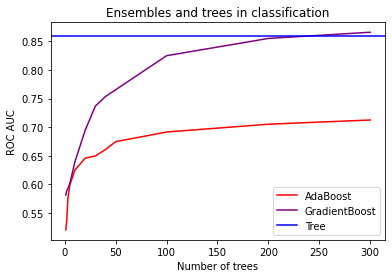

In [42]:
print('Comparison on Decision Tree Dataset:')
ntree=np.array([1, 2, 3, 5, 10, 20, 30, 40, 50, 100, 200, 300])
auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, dt_X, dt_y), ntree) # ADA AUC per number of trees
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, dt_X, dt_y), ntree) # GBC AUC per number of trees
auc_tree = dt_classifier_auc(dt_X, dt_y, max_depth=35, min_samples_split=2)
plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree)

### Tree Boosting outperforming Decision Trees ###

Dataset-TB is a dataset composed of two classes and 15 features. For a dataset with n features, a Decision Tree needs to have at least a depth of n. So with the number of features the tree depth increases, and by that the tree tends to overfit and is worse at generalizing the data. This is visible in the dataset-TB, where they perform poorly, while Tree Boosting is able to better approximate the data by reducing variance. 

Reducing the dataset dimension to 2D...


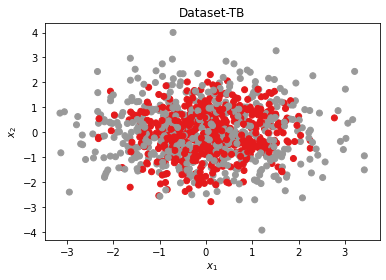

In [43]:
# Generate dataset
def data_tb():

    X, y = make_gaussian_quantiles(
        n_samples=1000,
        n_features=15,
        n_classes=2,
        random_state=42
    )

    return X, y

tb_X, tb_y = data_tb()
plot_2d(tb_X, tb_y, 'Dataset-TB')

In [44]:
# Decision Trees

print('Decision Tree Performance on Dataset TB:')
dtree=DTC(criterion='entropy', max_depth=None, min_samples_split=2)
test_model(dtree, tb_X, tb_y)

# Tree Boosting ADA
tboost = AdaC(n_estimators=150)
print('Tree Boosting ADA Performance on Dataset TB:')
test_model(tboost, tb_X, tb_y)

# Tree Boosting GBC
tboost = GBC(n_estimators=150)
print('Tree Boosting GBC Performance on Dataset TB:')
test_model(tboost, tb_X, tb_y)

Decision Tree Performance on Dataset TB:
Mean AUC score: 0.651
The classifier boundary can't be plotted because the dataset has more than 2 dimensions
Tree Boosting ADA Performance on Dataset TB:
Mean AUC score: 0.857
The classifier boundary can't be plotted because the dataset has more than 2 dimensions
Tree Boosting GBC Performance on Dataset TB:
Mean AUC score: 0.807
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


Comparison on Tree Boost Dataset:


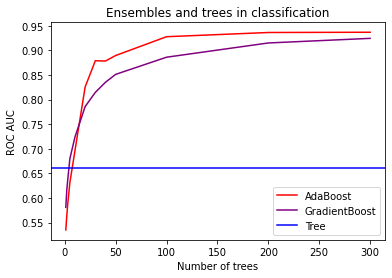

In [45]:
print('Comparison on Tree Boost Dataset:')
ntree=np.array([1, 2, 3, 5, 10, 20, 30, 40, 50, 100, 200, 300])
auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, tb_X, tb_y), ntree)
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, tb_X, tb_y), ntree)
auc_tree = dt_classifier_auc(tb_X, tb_y, max_depth=None, min_samples_split=2)

plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree)